# 18.303 Homework 1 Notebook

This notebook accompanies the first problem set posted on the [18.303 web page](https://github.com/mitmath/18303), and is here to get you started with your own finite difference calculations in Julia.

You will need to install [Julia](https://julialang.org/) and [IJulia](https://github.com/JuliaLang/IJulia.jl) to use this notebook. Don't hestitate to ask for help if the install process doesn't go smoothly.

Once you're up and running, run the following code snippet to bring in the packages we use in this notebook.

In [1]:
using LinearAlgebra
using Plots

## Finite Difference Matrices

The code snippets below builds the $n\times n$ first-order forward difference matrix that maps the vector of values $u = (u_1, u_2, \ldots, u_n)^T$ to the vector of approximate derivatives $u' = (u_1',u_2',\ldots,u_n')^T$ for a periodic function sampled at $n$ equispaced points (with spacing $h=1/n$) on the periodic interval $[0, 1)$, where
$$
u_k' = \frac{u_{k+1}-u_k}{h}, \qquad\text{with}\qquad u_1 = u_{n+1},
$$
so that (only nonzero entries shown)
$$
\begin{pmatrix}
u_1' \\ u_2' \\ \vdots \\ u_n' 
\end{pmatrix}
=
\frac{1}{h}\begin{pmatrix}
-1 & 1 & & & \\
   & -1 & 1 & & \\
   &   & \ddots & \ddots & \\
   & &  & -1 & 1 \\
   1 & & & & -1
\end{pmatrix}
\begin{pmatrix}
u_1 \\ u_2 \\ \vdots \\ u_n
\end{pmatrix}.
$$

For Problem 2 on Homework 1, you may modify this code to build the second-order and fourth-order central difference matrices from part (c) and perform the numerical experiments in part (d).

In [2]:
## build differentiation matrix (0=>ones(n) puts length n vector of ones onto the main diagonal, 1=>ones(n-1) puts length n-1 vector of ones onto the first superdiagonal)
function fdiff(n)
    h = 1 / n
    D = diagm(0 => -ones(n), 1 => ones(n-1))
    D[end,1] = 1
    D = D / h
end

# 100 x 100 differentiation matrix
fdiff(100)

100×100 Matrix{Float64}:
 -100.0   100.0     0.0     0.0     0.0  …     0.0     0.0     0.0     0.0
    0.0  -100.0   100.0     0.0     0.0        0.0     0.0     0.0     0.0
    0.0     0.0  -100.0   100.0     0.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0  -100.0   100.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0  -100.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0  …     0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
    ⋮                                    ⋱                          
    0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
    0.

Now, let's test the difference matrix on the function $u(x) = \cos(2\pi x)$, which has exact derivative $u'(x) = -2\pi\sin(2\pi x)$. 

We plot the derivative $u'(x)$ with its finite difference approximation on a grid of $n=500$ points, along with the error on the grid. 

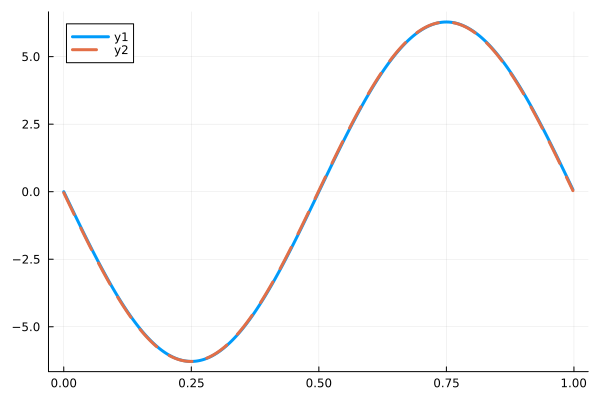

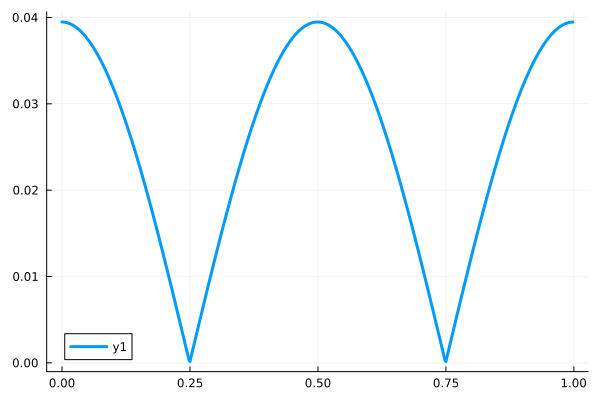

In [4]:
# exact u and u'
u = x -> cos.(2*pi*x)
up = x -> -2*pi*sin.(2*pi*x)

# equally spaced grid on periodic interval [0,1)
n = 500
h = 1/n
xgrid = LinRange(0,1-h,n)

# samples of u and u' on grid
ugrid = u(xgrid)
upgrid = up(xgrid)

# finite difference approximation on grid
D = fdiff(n)
fdupgrid = D*ugrid


plot(xgrid, upgrid, lw = 3, ls = :solid)
display(plot!(xgrid, fdupgrid, lw = 3, ls = :dash))
display(plot(xgrid, abs.(fdupgrid-upgrid), lw = 3))

Now, let's plot the the maximum error on the grid while increasing the number of grid points $n$: say, $n=100, 200, 300, \ldots, 5000$. We compare with the theoretical error bound from Lecture 3 notes.

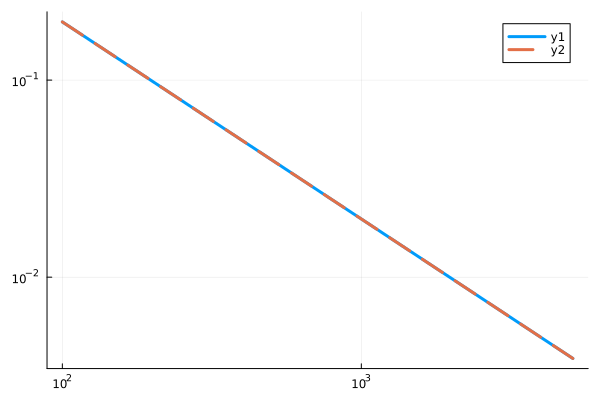

In [5]:
err = zeros(51)
nvals = 100*collect(1:51)
for indx = 1:51
    
    # size of grid
    n = nvals[indx]
    h = 1/n

    # equally spaced grid on periodic interval [0,1)
    xgrid = LinRange(0,1-h,n)

    # samples of u and u' on grid
    ugrid = u(xgrid)
    upgrid = up(xgrid)

    # finite difference approximation on grid
    D = fdiff(n)
    fdupgrid = D*ugrid

    # maximum value on the grid
    err[indx] = maximum(abs.(upgrid-fdupgrid))
end

# plot errors on log-log axis so that algebraic convergence is a straight line
plot(nvals, err, lw = 3, xscale = :log10, yscale = :log10)
plot!(nvals, 2 * pi^2 * 1 ./ nvals, lw = 3, ls = :dash)        # dashed line = error bound from Taylor remainder formula (Lecture 3 notes)

## Time-stepping with finite-differences

The following code snippets illustrate how to combine the forward Euler method in time with a finite-difference discretization in space to solve a first-order transport equation

$$
\partial_t u(x,t) + x^2 \partial_x u(x,t) = 0, \qquad\text{where}\qquad u(x,0) = \exp(-100(x-0.5)^2).
$$

You may modify this code to tackle the computational parts of Problem 3.

┌ Info: Saved animation to C:\Users\phros\AppData\Local\Temp\jl_tmeR1x4GS8.gif
└ @ Plots C:\Users\phros\.julia\packages\Plots\M4dfL\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\phros\\AppData\\Local\\Temp\\jl_tmeR1x4GS8.gif")
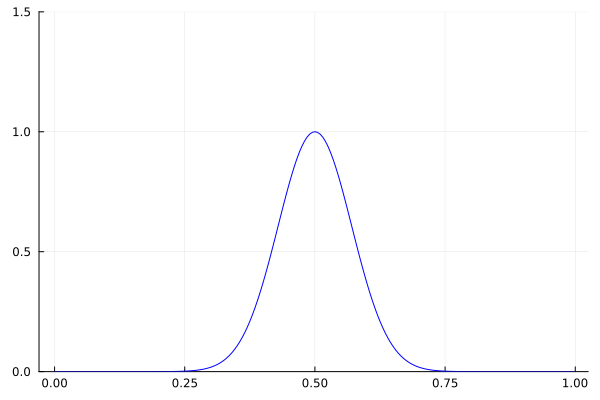

In [6]:

# computational grid = periodic interval [0, 1)
n = 200
h = 1/n
xgrid = LinRange(0,1-h,n)

# spatial discretization
D = fdiff(n)               # first partial derivative with respect to spatial variable
Mx = diagm(0 => xgrid.^2)   # multiplication by x^2 on grid
L = Mx * D                  # discretization of differential operator [Lu](x) = x^2 du/dx

# time stepping (step forward in time with time-step h_t using Forward Euler)
ht = 0.01                   # time step
function time_step(L,u1,ht)
    u2 = u1 + ht * L*u1
end

# initial condition
u1 = exp.(-100*(xgrid .- 0.5).^2)

# time stepping gif
anim = Animation()
m = 100                         # number of steps in time 
for k ∈ 1:m                     # animate solution
    plot(xgrid, u1, linecolor = :blue, legend = false)
    ylims!(0.0,1.5)
    u1 = time_step(L,u1,ht)
    frame(anim)
end
gif(anim)